We’ll use the 'Russian housing market' dataset from Kaggle.
First, let’s take a look at the data in Python.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/housing market data.csv')

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


We can also identify the numeric and non-numeric columns. These are necessary since we often treat them using different methods.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


## Missing data
Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

#### Method #1: missing data (by columns) count & percentage
This is the most basic method to detect missing data among columns.
We print out the summary of all the non-numeric columns below. By looking at the Non-Null Count, we can spot the number of missing data by columns. For our example, all non-null counts are 30,471, the same as the total number of rows, so there are no missing data among the non-numeric columns!

In [ ]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  28895 non-null  object
 1   product_type               28895 non-null  object
 2   sub_area                   28895 non-null  object
 3   culture_objects_top_25     28895 non-null  object
 4   thermal_power_plant_raion  28895 non-null  object
 5   incineration_raion         28895 non-null  object
 6   oil_chemistry_raion        28895 non-null  object
 7   radiation_raion            28895 non-null  object
 8   railroad_terminal_raion    28895 non-null  object
 9   big_market_raion           28895 non-null  object
 10  nuclear_reactor_raion      28895 non-null  object
 11  detention_facility_raion   28895 non-null  object
 12  water_1line                28895 non-null  object
 13  big_road1_1line            28895 non-null  object
 14  railro

We can print out the first 10 columns to look at.

In [ ]:
num_missing = df.isna().sum()
num_missing[:10]

,0
id,0
timestamp,0
full_sq,0
life_sq,5437
floor,166
max_floor,9560
material,9560
build_year,12706
num_room,9560
kitch_sq,9560


In [ ]:
pct_missing = df.isna().mean()
pct_missing[:10]

,0
id,0.000000
timestamp,0.000000
full_sq,0.000000
life_sq,0.188164
floor,0.005745
max_floor,0.330853
material,0.330853
build_year,0.439730
num_room,0.330853
kitch_sq,0.330853


#### Method #2: missing data (by columns) heatmap
The seaborn library is a popular statistical data visualization library. Let’s first use it to plot the missing data heatmap.

<Axes: >

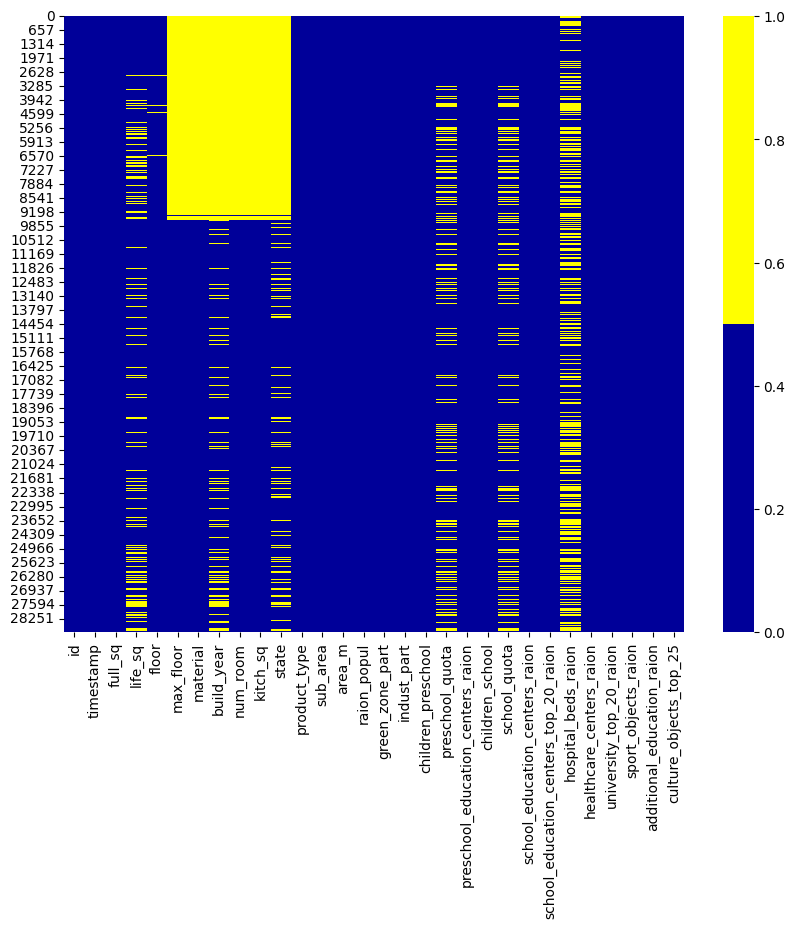

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

#### Method #3: missing data (by rows) histogram
We’ve been looking at missing data by columns. But we can also summarize the missing data by rows. Missing data histogram is a technique for summarizing such information.

<Axes: >

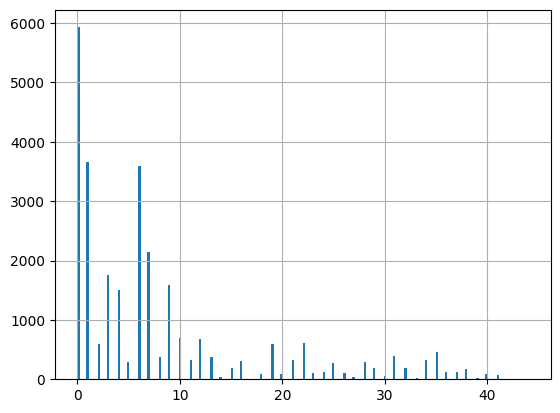

In [ ]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=200)

### What to do?
There are NO agreed-upon solutions to dealing with missing data. We have to study the dataset and its specific columns to determine how to clean their missing values.

#### Technique #1: drop columns / features
We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative.

In [ ]:
pct_missing[pct_missing > .3] # What are the columns with over 30% missing data then apply the copy method to make a copy to the new DataFrame df_less_missing_cols.
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(28895, 282)

#### Technique #2: drop rows / observations
We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

In [ ]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(27830, 292)

#### Technique #3: impute the missing with constant values
Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values. For example, we can impute the numeric columns with a value of -999 and impute the non-numeric columns with ‘_MISSING_’.

In [ ]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

#### Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics.
For example, we can impute the numeric columns with their respective medians.

In [ ]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

We can also impute the non-numeric columns with their most frequent values. Then we can use it to fill in the missing.

In [ ]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

## Irregular data (outliers)
Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

#### Method #1: descriptive statistics
First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers. Among the first 10 columns, we can see that life_sq has the highest kurtosis value. But note that the high value of kurtosis doesn’t guarantee outliers. So we’ll investigate this column more soon. For the column life_sq, we can see that the maximum value is 7,478, while the 75th percentile is only 43. The maximum value is an outlier.

In [ ]:
df.kurt(numeric_only=True)[:10]
df['life_sq'].describe()

,life_sq
count,23458.000000
mean,34.143235
std,52.158376
min,0.000000
25%,20.000000
50%,30.000000
75%,43.000000
max,7478.000000


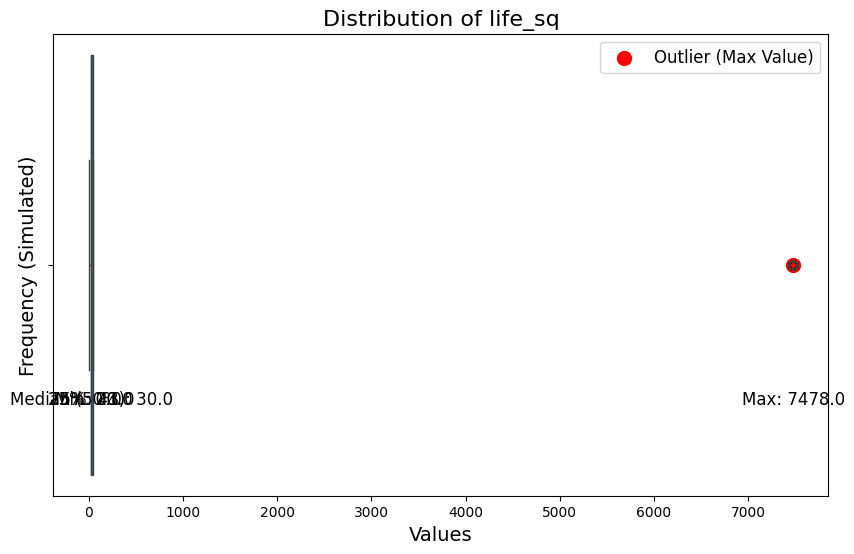

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data based on the description of 'life_sq'
data = {
    'count': 23458,
    'mean': 34.143235,
    'std': 52.158376,
    'min': 0.0,
    '25%': 20.0,
    '50%': 30.0,
    '75%': 43.0,
    'max': 7478.0
}

# Values for visualization
values = [data['min'], data['25%'], data['50%'], data['75%'], data['max']]
labels = ['Min', '25%', 'Median (50%)', '75%', 'Max']

# Boxplot to show distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.random.choice(values, size=data['count'], p=[0.1, 0.2, 0.4, 0.2, 0.1]), width=0.3)
plt.title('Distribution of life_sq', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency (Simulated)', fontsize=14)

# Annotate the boxplot with key values
for i, value in enumerate(values):
    plt.text(value, 0.1, f'{labels[i]}: {value}', horizontalalignment='center', fontsize=12)

# Highlighting the extreme max value
plt.scatter(data['max'], 0, color='red', label='Outlier (Max Value)', s=100)
plt.legend(loc='upper right', fontsize=12)
plt.show()


#### Method #2: histogram & box plot
From the histogram, we can see that the data is highly skewed with the possible existence of outliers. But due to the low frequency, we can’t see the exact location of the outliers and the counts. From the histogram, we can see that the data is highly skewed with the possible existence of outliers. But due to the low frequency, we can’t see the exact location of the outliers and the counts. From the box plot, we get a more clear view of the outliers. There is an outlier with a value of over 7,000. In fact, all the dots on the plot are considered outliers by the box plot definition.

<Axes: >

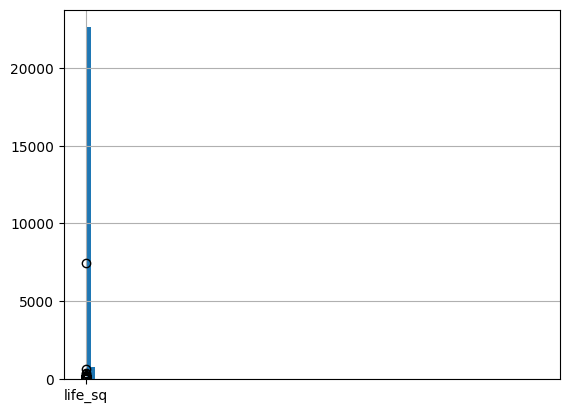

In [ ]:
df['life_sq'].hist(bins=100)

df.boxplot(column=['life_sq'])

### What to do?
While outliers are not hard to see, it is tricky to clean them. It depends on the dataset and the goal of the project.

The methods of handling outliers are somewhat similar to missing data. We could drop, replace, or even just keep them.

## Unnecessary data
Those are a lot of hard work for missing data and outliers! Let’s clean something more straightforward in this section: the unnecessary data.

#### Unnecessary type #1: repetitive & uninformative
One column can have many observations being the same value. When an extremely high percentage of the column has a repetitive value, we should investigate whether such a column provides valuable information.

We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.

In [ ]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In fact, there’s no such column in our example dataset.

#### What to do?
If there is one column with a high percentage of the same value, we should look into it to see if it’s informative. We can drop them when they are not, e.g., when the column has 100% being the same value.

#### Unnecessary type #2: irrelevant
Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve, they are irrelevant.

#### How to find out?
We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

#### What to do?
When the features are not serving the project’s goal, we can remove them. You could use the 'drop' method in pandas.

#### Unnecessary type #3: duplicates
The duplicate data is when copies of the same observation exist. Let’s look at 2 main types of duplicate data and clean them in Python.

#### Duplicates type #1: all columns based
#### How to find out?
This is easy to understand. Such duplicate occurs when all the columns’ values within the observations are the same.

We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from df.

We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

In [ ]:
df[df.duplicated()]
df.drop_duplicates()

## Inconsistent data

#### Inconsistent type #1: capitalization
Inconsistent use of upper and lower cases in categorical values is typical. We need to clean it since Python is case-sensitive.

In [ ]:
df['sub_area'].value_counts(dropna=False)
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

#### Inconsistent type #2: data types
Another standardization we often need to look at is the data types.

We could also print out one column to take a look. Let’s try timestamp.

In [ ]:
df['timestamp']

timestamp has dtype of object while it records dates.

In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

df[['timestamp_dt', 'year', 'month', 'weekday']].head()

#### Inconsistent type #3: typos of categorical values
A categorical column takes on a limited and usually fixed number of possible values. Sometimes it shows other values due to reasons like typos.

Let’s see an example. Within the code below:

* We generate a new DataFrame, df_city_ex
There is only one column that stores the city names. There are misspellings. For example, ‘torontoo’ and ‘tronto’ both refer to the city of ‘toronto’.
* The variable cities stores the 4 correct names of ‘toronto’, ‘vancouver’, ‘montreal’, and ‘calgary’.
* To identify typos, we use fuzzy logic matches. We use edit_distance from nltk, which measures the number of operations (e.g., substitution, insertion, deletion) needed to change from one string into another string.
* We calculate the distance between the actual values and the correct values.

In [ ]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

#### What to do?
We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [ ]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex